# Importing Repositories

In [76]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import holidays
from scipy import stats
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=(20,10)

In [77]:
def missing_zero_values_table(df):
        ''''Takes a pandas dataframe and returns a statistics table that explains the missing and 
        zero values'''
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Our selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

# Importing data files

## Paths for files

In [78]:
path_price = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadPrices_12.1.D'
path_totalload = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadTotalLoadForecast'
path_windsolar = r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\DayAheadGenerationForecastForWindAndSolar_14.1.D'

## Price Timeseries Importing

In [79]:

df_price = pd.read_csv(r'C:\Users\2836589S\OneDrive - University of Glasgow\Data\Data Frames\price_timeseries_outliers.csv', 
parse_dates=['DateTime'])


In [80]:
df_price = df_price[['DateTime', 'Year', 'Month','Week', 'Day', 'Hour', 'Price']]
df_price

,DateTime,Year,Month,Week,Day,Hour,Price
0,2015-01-01 00:00:00,2015,1,1,3,0,0.00
1,2015-01-01 01:00:00,2015,1,1,3,1,0.00
2,2015-01-01 02:00:00,2015,1,1,3,2,0.00
3,2015-01-01 03:00:00,2015,1,1,3,3,0.00
4,2015-01-01 04:00:00,2015,1,1,3,4,0.00
...,...,...,...,...,...,...,...
52529,2020-12-31 18:00:00,2020,12,53,3,18,71.30
52530,2020-12-31 19:00:00,2020,12,53,3,19,61.04
52531,2020-12-31 20:00:00,2020,12,53,3,20,60.39
52532,2020-12-31 21:00:00,2020,12,53,3,21,57.96


## Wind and Solar Timeseries Importing

In [81]:
f_windsolar = glob.glob(path_windsolar + "/*.csv")
dwindsolar = [pd.read_csv(f, sep='\t', parse_dates=['DateTime']) for f in f_windsolar]

df_windsolar = pd.concat(dwindsolar)
df_windsolar = df_windsolar[df_windsolar['AreaCode'] == '10YGB----------A']
df_windsolar = df_windsolar[['DateTime', 'ProductionType', 'AggregatedGenerationForecast']]
df_windsolar.sort_values(by='DateTime', ascending=True)
df_windsolar.reset_index(drop=True, inplace=True)

In [82]:
df_windsolar

,DateTime,ProductionType,AggregatedGenerationForecast
0,2014-12-30 00:00:00,Solar,0.00
1,2014-12-30 01:00:00,Solar,0.00
2,2014-12-30 02:00:00,Solar,0.00
3,2014-12-30 03:00:00,Solar,0.00
4,2014-12-30 04:00:00,Solar,0.00
...,...,...,...
509107,2021-06-14 19:00:00,Wind Offshore,1563.23
509108,2021-06-14 20:00:00,Wind Offshore,1590.47
509109,2021-06-14 21:00:00,Wind Offshore,1574.14
509110,2021-06-14 22:00:00,Wind Offshore,1450.72


### Splitting the WindSolar Dataset into 3 Datasets per Solar, Wind Offshore, Wind Onshore

In [83]:
df_windsolar['ProductionType'].unique()

array(['Solar', 'Wind Offshore', 'Wind Onshore'], dtype=object)

In [84]:
df_solar = df_windsolar[df_windsolar['ProductionType'] == 'Solar']
df_solar.sort_values(by='DateTime', ascending=True)
df_solar.reset_index(drop=True, inplace=True)
df_solar.rename(columns={'AggregatedGenerationForecast':'SolarGeneration'}, inplace=True)
df_solar = df_solar[['DateTime','SolarGeneration']]
df_solar

,DateTime,SolarGeneration
0,2014-12-30 00:00:00,0.0
1,2014-12-30 01:00:00,0.0
2,2014-12-30 02:00:00,0.0
3,2014-12-30 03:00:00,0.0
4,2014-12-30 04:00:00,0.0
...,...,...
169699,2021-06-14 19:00:00,227.0
169700,2021-06-14 20:00:00,11.5
169701,2021-06-14 21:00:00,0.0
169702,2021-06-14 22:00:00,0.0


In [85]:
df_wind_off = df_windsolar[df_windsolar['ProductionType'] == 'Wind Offshore']
df_wind_off.sort_values(by='DateTime', ascending=True)
df_wind_off.reset_index(drop=True, inplace=True)
df_wind_off.rename(columns={'AggregatedGenerationForecast':'WindOffGeneration'}, inplace=True)
df_wind_off = df_wind_off[['DateTime', 'WindOffGeneration']]
df_wind_off

,DateTime,WindOffGeneration
0,2014-12-30 00:00:00,996.58
1,2014-12-30 01:00:00,1059.20
2,2014-12-30 02:00:00,1123.27
3,2014-12-30 03:00:00,1177.54
4,2014-12-30 04:00:00,1188.21
...,...,...
169699,2021-06-14 19:00:00,1563.23
169700,2021-06-14 20:00:00,1590.47
169701,2021-06-14 21:00:00,1574.14
169702,2021-06-14 22:00:00,1450.72


In [86]:
df_wind_on = df_windsolar[df_windsolar['ProductionType'] == 'Wind Onshore']
df_wind_on.sort_values(by='DateTime', ascending=True)
df_wind_on.reset_index(drop=True, inplace=True)
df_wind_on.rename(columns={'AggregatedGenerationForecast':'WindOnGeneration'}, inplace=True)
df_wind_on = df_wind_on[['DateTime','WindOnGeneration']]
df_wind_on

,DateTime,WindOnGeneration
0,2014-12-30 00:00:00,2363.80
1,2014-12-30 01:00:00,2413.88
2,2014-12-30 02:00:00,2450.75
3,2014-12-30 03:00:00,2500.78
4,2014-12-30 04:00:00,2536.07
...,...,...
169699,2021-06-14 19:00:00,4896.71
169700,2021-06-14 20:00:00,3928.19
169701,2021-06-14 21:00:00,3277.03
169702,2021-06-14 22:00:00,2880.91


# Merging Datasets

In [87]:
# Merging Price, Solar Generation, Wind offshore and Wind onshore generation datasets to one

df_merged = pd.merge(df_price, df_solar, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_off, how='left', on='DateTime')
df_merged = pd.merge(df_merged, df_wind_on, how='left', on='DateTime')
df_merged.drop_duplicates(subset=['DateTime'], keep='first', inplace=True)
df_model = pd.DataFrame()
df_model = df_merged[['Price','Year', 'Month', 'Day', 'Hour', 'SolarGeneration', 'WindOffGeneration',
'WindOnGeneration']]
df_model.set_index(df_merged['DateTime'], inplace=True)
df_model

,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration
DateTime,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,2987.05,4013.58
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,2926.71,4074.53
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,2867.00,4157.48
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,2808.72,4229.50
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,2769.59,4133.56
...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,2644.97,3028.41
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,2707.55,3046.72
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,2695.01,3053.60


## Transforming Solar, Wind Onshore and Wind Offshore Generation values

In [88]:
# Apply square root transformation to our predictors in order to have the scale with our dependent variable (Price)

df_model['SolarGeneration'] = df_model['SolarGeneration'].transform('sqrt')
df_model['WindOffGeneration'] = df_model['WindOffGeneration'].transform('sqrt')
df_model['WindOnGeneration'] = df_model['WindOnGeneration'].transform('sqrt')

# Creating lags - 2-weeks-lags

In [89]:
def lag_col(df, variable, lags):
    '''
        Takes in a pandas dataframe, a specific variable of the dataset and number of lags as a list
        and returns the df updated with the lags of the variable
        
        Parameters:
            df: pandas dataframe
            variable: string
            lags: list
        
        Returns:
            Adds column for every lag inside the list for our designated variable
        
        '''


    for lag in lags:
        df[str(variable) + '_' + str(lag)] = df[variable].shift(lag)
    return df

In [90]:
lags = list(range(1,336)) # 2-week-lags

In [91]:
lag_col(df_model, 'Price', lags)
lag_col(df_model, 'SolarGeneration', lags)
lag_col(df_model, 'WindOffGeneration', lags)
lag_col(df_model, 'WindOnGeneration', lags)


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.00,2015,1,3,0,0.0,54.653911,63.352822,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,0.00,2015,1,3,1,0.0,54.099076,63.832045,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,0.00,2015,1,3,2,0.0,53.544374,64.478524,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,0.00,2015,1,3,3,0.0,52.997358,65.034606,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,0.00,2015,1,3,4,0.0,52.626894,64.292768,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 18:00:00,71.30,2020,12,3,18,0.0,51.429272,55.030991,106.50,76.00,...,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787,85.768642,83.917936
2020-12-31 19:00:00,61.04,2020,12,3,19,0.0,52.034123,55.197101,71.30,106.50,...,74.480064,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787,85.768642
2020-12-31 20:00:00,60.39,2020,12,3,20,0.0,51.913486,55.259388,61.04,71.30,...,73.915695,74.480064,74.946247,75.866989,77.999167,80.867793,83.303781,85.524675,86.451721,86.861787


# Re-forming our dataset

## Creating single-hour data blocks

In [92]:
df_model.dropna(inplace=True) # Clearing na values

#Create multi-dataframe that will have every single dataset regarding the time of the day

hours = df_model['Hour'].unique().tolist()
df_hour ={hour: pd.DataFrame() for hour in hours}
for i in range(len(hours)):
    df_hour[i] = df_model[df_model['Hour'] == i]
    df_hour[i] = df_hour[i][(np.abs(stats.zscore(df_hour[i]['Price']))<3)]


# Example of the dataset of 00:00    
df_hour[0]


,Price,Year,Month,Day,Hour,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-16,32.14,2015,1,4,0,0.0,55.447182,85.482805,32.27,0.00,...,70.690593,70.416120,71.065463,71.777643,72.254827,72.374581,72.519377,72.603443,72.912276,73.184698
2015-01-17,35.57,2015,1,5,0,0.0,49.436019,51.984132,34.92,37.90,...,34.457365,36.234238,37.987893,40.228970,43.426835,48.417662,53.901020,58.642647,61.652737,63.449744
2015-01-18,39.06,2015,1,6,0,0.0,26.366077,36.817795,40.00,38.95,...,37.609972,37.259898,36.469302,35.555450,34.700576,33.975874,33.104380,32.289782,31.850275,31.527290
2015-01-19,35.44,2015,1,0,0,0.0,38.227739,44.782809,35.01,35.09,...,51.293274,51.021662,50.670406,50.487028,50.145289,49.360105,48.514740,48.293995,48.496598,48.553785
2015-01-20,34.21,2015,1,1,0,0.0,14.527560,24.740251,34.03,39.00,...,48.676278,48.989999,50.983233,52.457697,53.990555,55.977495,57.971976,59.715408,59.583303,59.051164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.70,2020,12,6,0,0.0,98.853933,88.450438,2.74,22.60,...,82.875087,79.668375,75.296680,70.293883,64.691808,60.170258,54.845510,50.028692,45.649096,41.076027
2020-12-28,56.00,2020,12,0,0,0.0,61.641950,47.702096,42.00,64.40,...,75.342684,75.941754,76.315136,77.130344,78.079127,79.319796,80.540300,81.518894,81.904945,81.883271
2020-12-29,64.95,2020,12,1,0,0.0,34.614737,40.164039,63.99,51.40,...,61.735160,61.796359,62.376999,62.826348,63.588442,64.779858,65.508854,66.554940,67.270053,67.715065


In [93]:
# Dropping unwanted features for every single dataset and dropping the nan values
for i in range(len(hours)):
    df_hour[i].drop(columns=['Year','Day','Month','Hour'], inplace=True)
    df_hour[i].dropna(inplace=True)

# Example of data frame regarding the 23:00 data frame
df_hour[23]

,Price,SolarGeneration,WindOffGeneration,WindOnGeneration,Price_1,Price_2,Price_3,Price_4,Price_5,Price_6,...,WindOnGeneration_326,WindOnGeneration_327,WindOnGeneration_328,WindOnGeneration_329,WindOnGeneration_330,WindOnGeneration_331,WindOnGeneration_332,WindOnGeneration_333,WindOnGeneration_334,WindOnGeneration_335
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-01-15 23:00:00,32.27,0.0,44.419928,68.855646,0.00,0.00,0.00,0.00,0.00,0.00,...,70.416120,71.065463,71.777643,72.254827,72.374581,72.519377,72.603443,72.912276,73.184698,73.214411
2015-01-16 23:00:00,34.92,0.0,43.226612,62.133646,37.90,40.96,54.99,50.00,51.87,69.05,...,36.234238,37.987893,40.228970,43.426835,48.417662,53.901020,58.642647,61.652737,63.449744,65.199233
2015-01-17 23:00:00,40.00,0.0,32.059632,41.775471,38.95,38.98,42.21,44.97,59.19,74.96,...,37.259898,36.469302,35.555450,34.700576,33.975874,33.104380,32.289782,31.850275,31.527290,31.585440
2015-01-18 23:00:00,35.01,0.0,37.492533,42.639770,35.09,42.03,42.97,44.49,55.05,72.03,...,51.021662,50.670406,50.487028,50.145289,49.360105,48.514740,48.293995,48.496598,48.553785,48.506288
2015-01-19 23:00:00,34.03,0.0,18.648592,24.622957,39.00,40.50,44.59,50.83,65.00,91.12,...,48.989999,50.983233,52.457697,53.990555,55.977495,57.971976,59.715408,59.583303,59.051164,58.826100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25 23:00:00,49.40,0.0,81.688800,77.979228,46.20,49.20,54.24,58.16,49.64,52.95,...,42.891957,43.211688,43.287989,43.348472,43.945648,44.082876,44.122670,43.942349,43.489999,43.324704
2020-12-27 23:00:00,42.00,0.0,47.064955,42.775811,64.40,64.90,58.70,70.00,75.86,86.80,...,75.941754,76.315136,77.130344,78.079127,79.319796,80.540300,81.518894,81.904945,81.883271,81.361785
2020-12-28 23:00:00,63.99,0.0,44.310721,43.196296,51.40,60.94,56.06,72.01,72.70,99.93,...,61.796359,62.376999,62.826348,63.588442,64.779858,65.508854,66.554940,67.270053,67.715065,68.057990


# Lasso Model

## Dataset Split

In [176]:
from sklearn.model_selection import train_test_split

# Splitting every dataset for our dependent and independent variables 

X_train = {hour: pd.DataFrame() for hour in hours}
y_train = {hour: pd.DataFrame() for hour in hours}
X_test = {hour: pd.DataFrame() for hour in hours}
y_test = {hour: pd.DataFrame() for hour in hours}

for hour in range(len(hours)):
    X_train[hour], X_test[hour], y_train[hour], y_test[hour] = train_test_split(df_hour[hour].drop(columns='Price'),
                                                                                df_hour[hour]['Price'],
                                                                                test_size=0.25,
                                                                                shuffle=False)

## Lasso Regressor and TimeSeriesSplit

In [177]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Creating the object that will be used during the cross-validation, with 5 folds
tscv = TimeSeriesSplit(n_splits=5)


# Create empty dataframes with hour as index in order to fill the trained models, and train them accordingly
model_test = {hour: pd.DataFrame() for hour in hours}
model_train = {hour: pd.DataFrame() for hour in hours}



# We will traing every model for every hour, and we generate a data frame that will inform us about the r-squared,
# alpha value and intercept for every model

rsquared_test = []
rsquared_train = []
model_name = []


for hour in hours:
    model_train[hour] = LassoCV(cv=tscv, random_state=0).fit(X_train[hour],y_train[hour])
    model_test[hour] = LassoCV(cv=tscv, random_state=0).fit(X_test[hour],y_test[hour])
    rsquared_train.append(model_train[hour].score(X_train[hour], y_train[hour]))
    rsquared_test.append(model_test[hour].score(X_test[hour], y_test[hour]))
    model_name.append('model[' + str(hour) + ']')

model_results = pd.DataFrame(columns=['Model', 'Rsquared Value Train', 'Rsquared Value Test'])
model_results['Model'] = model_name
model_results['Rsquared Value Train'] = rsquared_train
model_results['Rsquared Value Test'] = rsquared_test


# Table that shows the results for every trained model
model_results

,Model,Rsquared Value Train,Rsquared Value Test
0,model[23],0.853035,0.844245
1,model[0],0.914811,0.951773
2,model[1],0.934041,0.954529
3,model[2],0.932570,0.947888
4,model[3],0.939181,0.945429
5,model[4],0.901385,0.877643
6,model[5],0.912966,0.881454
7,model[6],0.852183,0.903980
8,model[7],0.850792,0.884405
9,model[8],0.883271,0.937443


In [309]:
# Create multi data frame that will inform us about its coefficients with a descending order

df_coef = {hour: pd.DataFrame() for hour in hours}
for hour in hours:
    df_coef[hour].index = X_train[hour].transpose().index
    df_coef[hour]['Coefficients'] = model_train[hour].coef_.transpose()
    df_coef[hour].sort_values(by='Coefficients', ascending=False, inplace=True)
    df_coef[hour]

# Example of coefficient table of our top 10 coefficients for hour 8:00
a = df_coef[18].head(10)
a


,Coefficients
Price_1,0.143396
Price_24,0.102677
Price_264,0.031777
Price_48,0.027358
Price_312,0.025381
Price_72,0.022834
Price_168,0.008911
Price_120,0.005441
Price_240,0.005370
Price_288,0.002394


Text(0.5, 0, 'Coefficients')

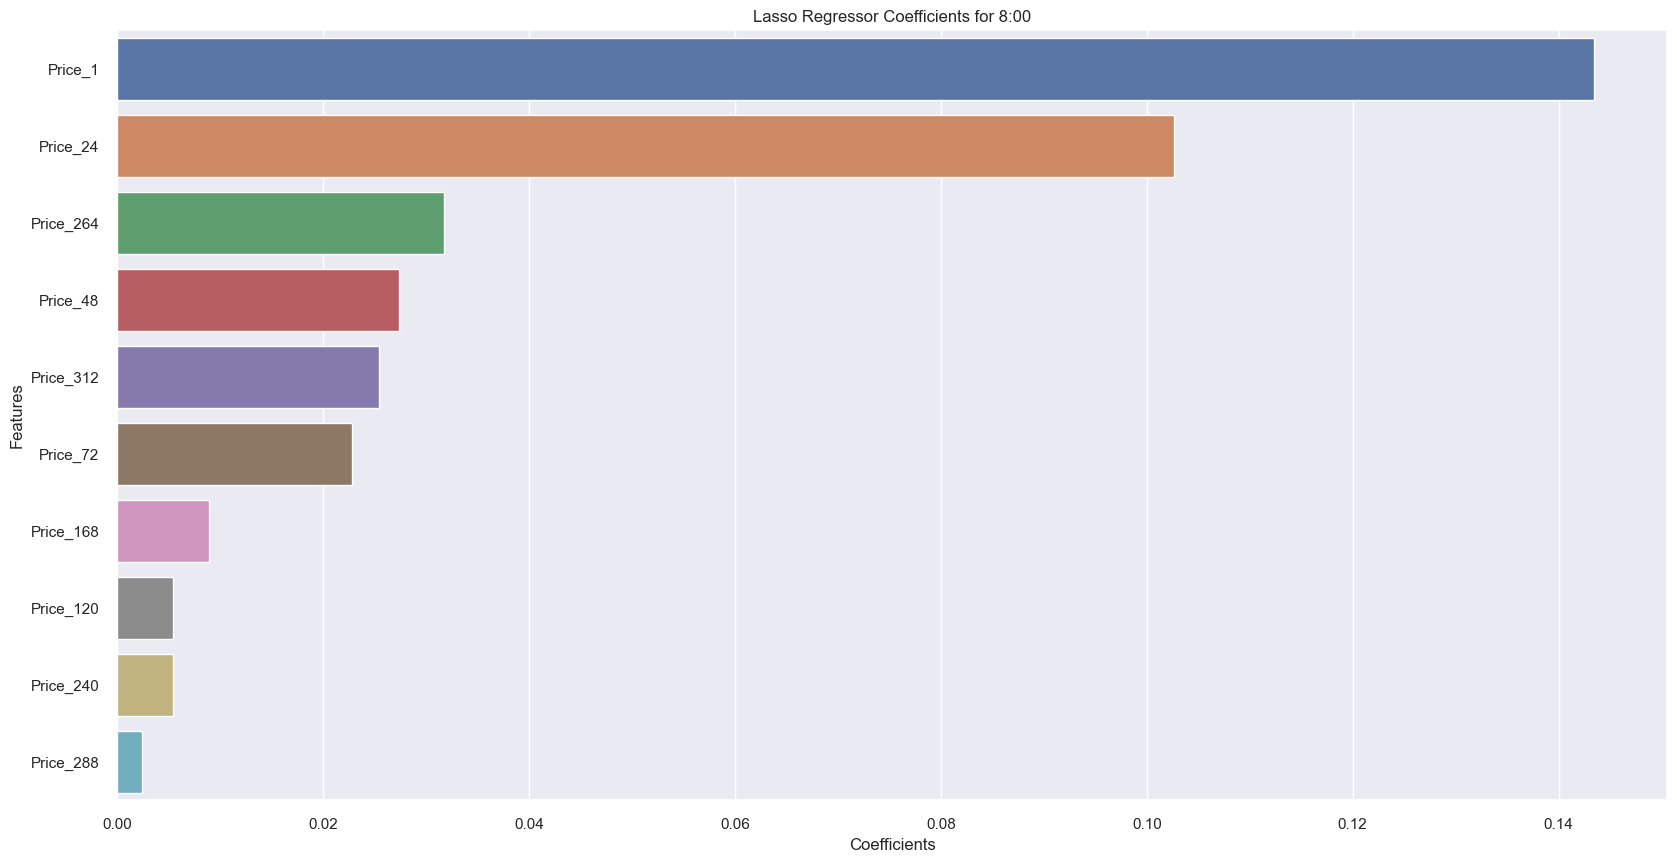

In [310]:
# Barplot for top 10 coeffiecients (features) for hour 8:00

sns.barplot(x=a['Coefficients'],y=a.index )
plt.title('Lasso Regressor Coefficients for 8:00')
plt.ylabel('Features')
plt.xlabel('Coefficients')

In [308]:
# Create multi data frame that will provides us with the residuals and squared residuals for every trained model, 
# for every hour


lasso = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    lasso[hour] = pd.DataFrame(columns=['Actual Value', 'Predicted Value', 'Residual', 'Squared Residuals'])
    lasso[hour]['Actual Value'] = y_test[hour]
    lasso[hour]['Predicted Value'] = model_train[hour].predict(X_test[hour])
    lasso[hour]['Residual'] = lasso[hour]['Actual Value'] - lasso[hour]['Predicted Value']
    lasso[hour]['Squared Residuals'] = lasso[hour]['Residual'].mul(lasso[hour]['Residual'])


# Example of the table
lasso[18]

,Actual Value,Predicted Value,Residual,Squared Residuals
DateTime,,,,
2019-07-13 18:00:00,51.89,58.620353,-6.730353,45.297657
2019-07-14 18:00:00,54.19,58.956120,-4.766120,22.715898
2019-07-15 18:00:00,66.40,62.057572,4.342428,18.856677
2019-07-16 18:00:00,60.76,61.583555,-0.823555,0.678242
2019-07-17 18:00:00,50.96,60.076743,-9.116743,83.115000
...,...,...,...,...
2020-12-27 18:00:00,75.86,66.289382,9.570618,91.596735
2020-12-28 18:00:00,72.70,69.357953,3.342047,11.169279
2020-12-29 18:00:00,73.99,69.299354,4.690646,22.002157


## Garch Model

## Working an example

In [338]:
from arch import arch_model

# Using arch_lasso_exp as an example, variable b takes an int number pointing the hour 
# we want to produce the arch model

b = 22

arch_lasso_exp = arch_model(lasso[b]['Residual'], vol='GARCH', p=2,q=2, dist='t', mean='Constant')
arch_lasso_exp = arch_lasso_exp.fit()
arch_lasso_exp.summary()

TypeError: 'Lasso' object is not subscriptable

Text(0.5, 1.0, 'Volatility for 18:00')

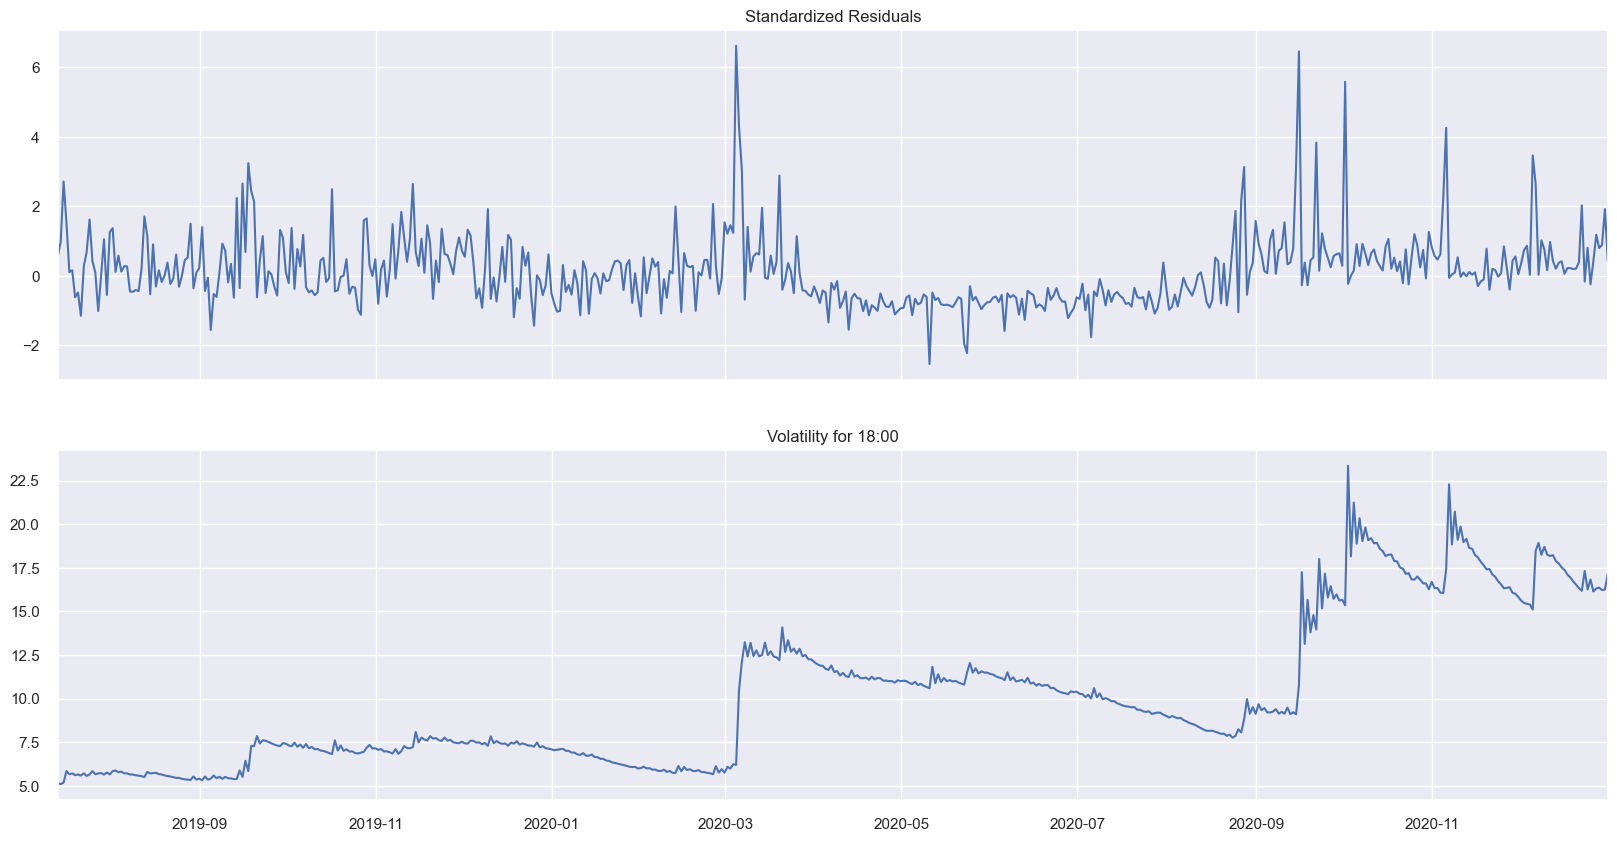

In [ ]:
# Producing conditional volatility plot for our garch model

arch_lasso_exp.plot();
plt.title('Volatility for ' + str(b) + ':00')


Text(0.5, 1.0, 'Distribution of Standardized Residuals for GARCH(1,1) - 18:00')

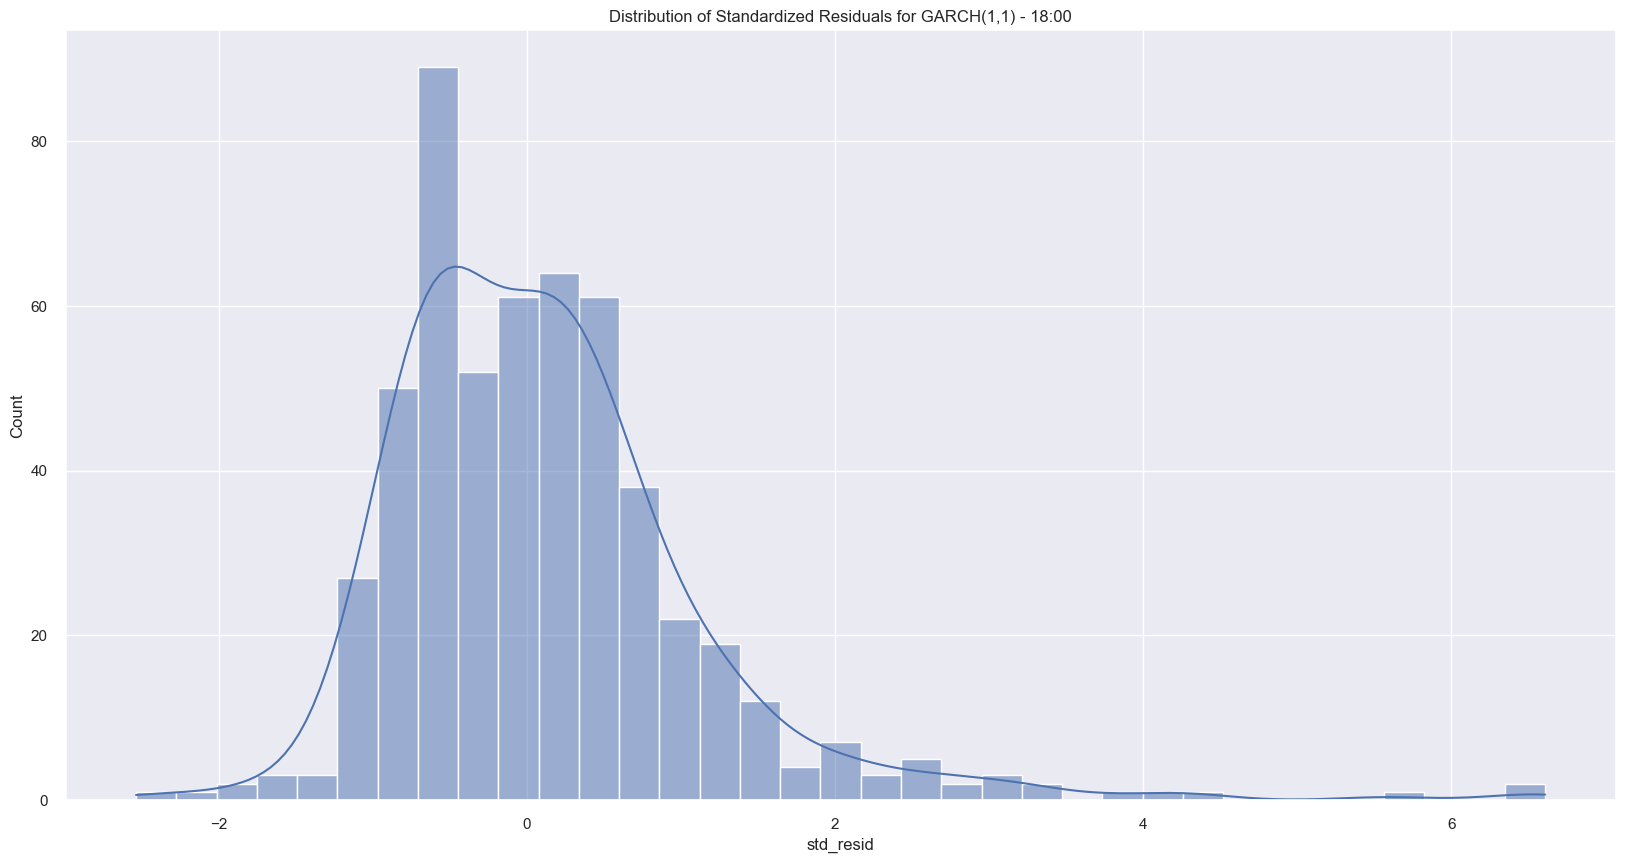

In [ ]:
# Plotting the standardized residuals of our garch model

sns.histplot(arch_lasso_exp.std_resid, kde=True)
plt.title('Distribution of Standardized Residuals for GARCH(1,1) - ' + str(b) + ':00')

Text(0.5, 1.0, 'QQplot for Standardized Residuals - GARCH(1,1) 18:00')

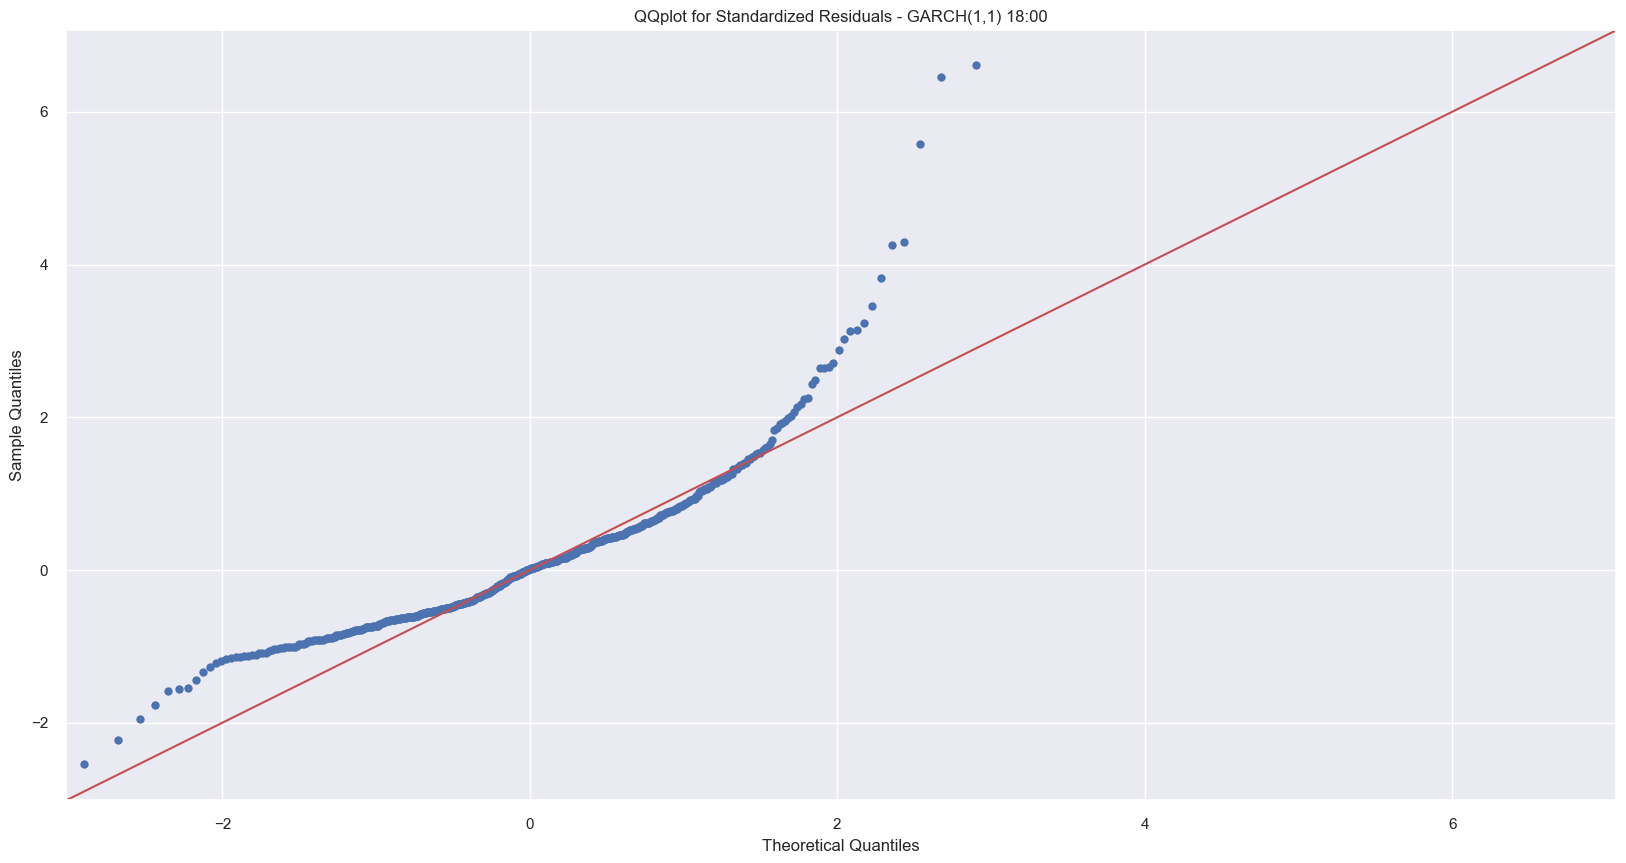

In [ ]:
# Plotting the qqplot of our standardized residuals

import statsmodels.api as sm
import pylab

x = arch_lasso_exp.std_resid
sm.qqplot(x, line='45')

plt.title('QQplot for Standardized Residuals - GARCH(1,1) ' + str(b) + ':00')

## Training every model

In [ ]:
# Training every garch model for every hour ( takes the residuals from our trained lasso models)

from scipy import stats
garch_lasso = {hour: pd.DataFrame() for hour in hours}

for hour in hours:
    garch_lasso[hour] = arch_model(lasso[hour]['Residual'], vol='GARCH', p=1,q=1, mean='Constant').fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2500.8718137789438
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2361.2233162662087
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1900.295640737262
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1567.6530750794036
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1791.3579333212679
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1566.9400358274906
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1566.9408390373528
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1566.9398856509779
Iteration:      9,   Func. Count:     55,   Neg. LLF: 1566.939885650981
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1566.9398856509779
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 50706.09048423999
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2263.159154

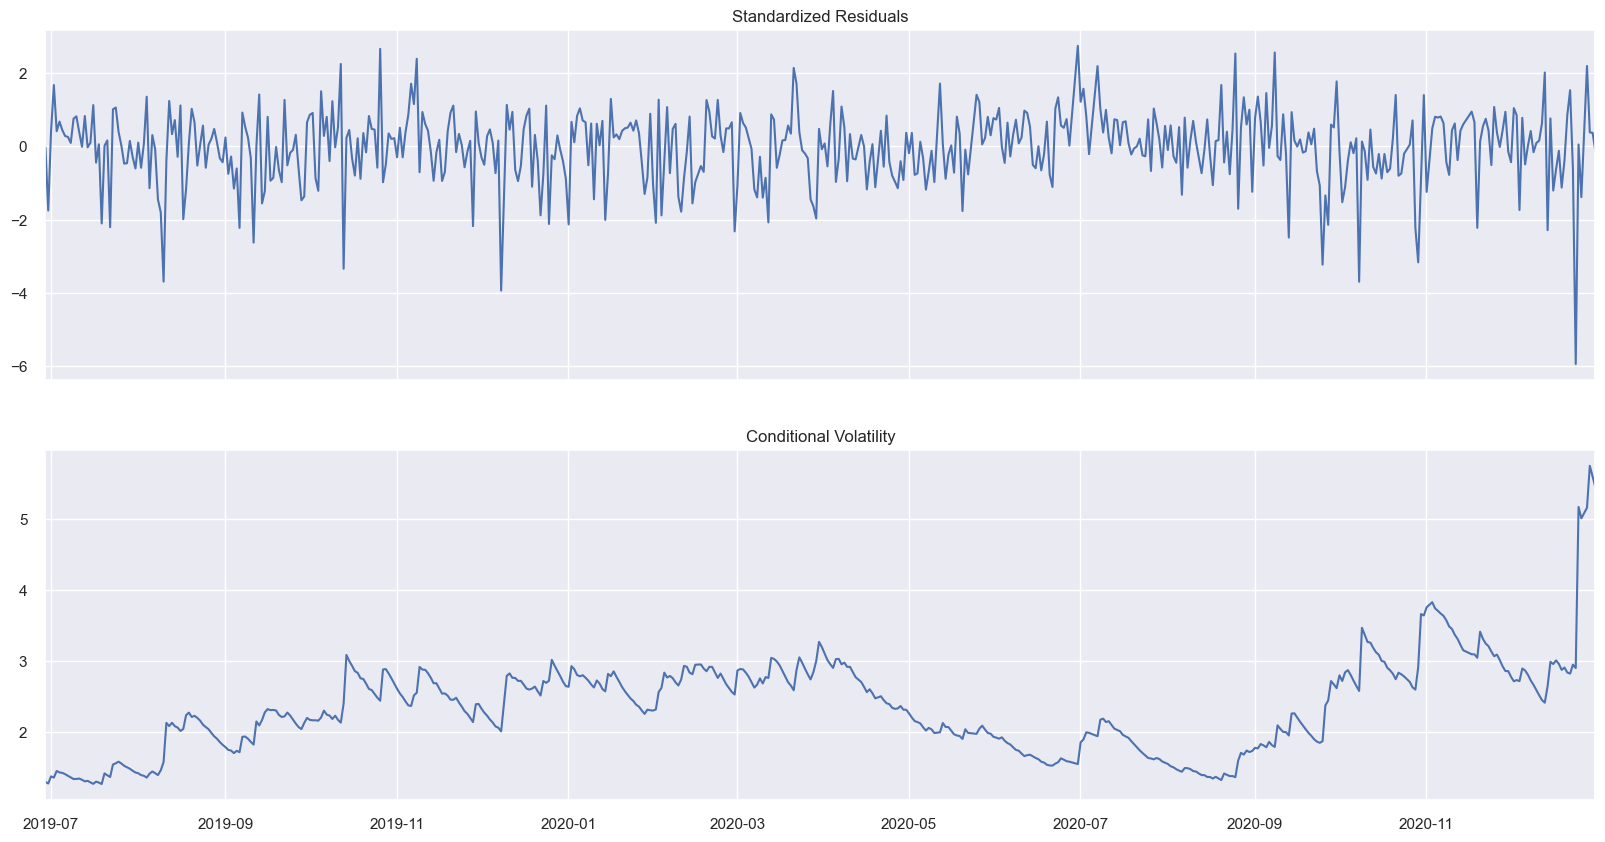

In [ ]:
fig = garch_lasso[2].plot()

# Evaluation Metrics

In [ ]:
df_results = {hour: pd.DataFrame() for hour in hours}


for hour in hours:
    df_results[hour] = lasso[hour]
    df_results[hour]['sigma'] = np.sqrt(garch_lasso[hour].conditional_volatility )
    

In [ ]:
df_results[15]

,Actual Value,Predicted Value,Residual,Squared Residuals,sigma,CRPS
DateTime,,,,,,
2019-07-08 15:00:00,47.36,45.003160,2.356840,5.554695,1.717611,1.521670
2019-07-09 15:00:00,46.00,45.322411,0.677589,0.459127,1.718272,0.506790
2019-07-10 15:00:00,44.00,46.658501,-2.658501,7.067628,1.718932,1.779220
2019-07-11 15:00:00,43.40,48.487849,-5.087849,25.886210,1.719592,4.119193
2019-07-12 15:00:00,38.83,41.375301,-2.545301,6.478560,1.720250,1.680364
...,...,...,...,...,...,...
2020-12-27 15:00:00,50.70,51.438594,-0.738594,0.545521,1.994004,0.573901
2020-12-28 15:00:00,48.19,60.634126,-12.444126,154.856275,1.994427,11.318891
2020-12-29 15:00:00,53.76,54.358586,-0.598586,0.358306,1.994849,0.537310


## Reliability Diagram

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


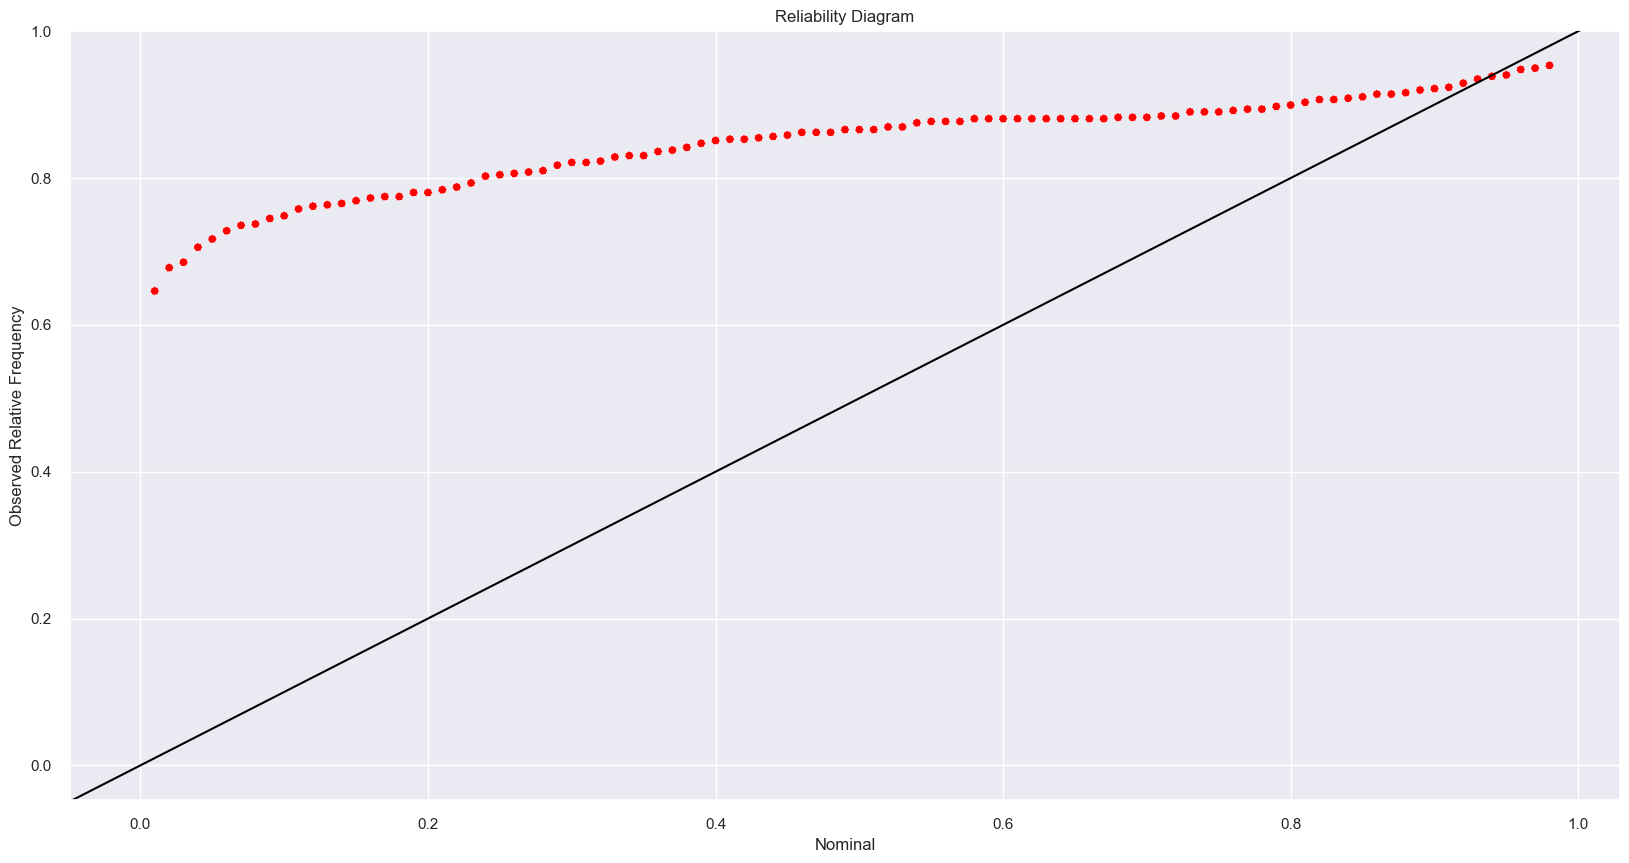

In [ ]:
%load_ext autoreload

%autoreload 2

from ProbEval import reliability_diagram

reliability_diagram(df=df_results[18], 
                    obs='Actual Value', 
                    mu='Predicted Value', 
                    std='sigma')

## CRPS

In [ ]:
%load_ext autoreload

%autoreload 2


from ProbEval import crps_norm

# Populate CRPS score to every dataframe
for hour in hours:
    df_results[hour]['CRPS'] = crps_norm(df_results[hour],
                                         obs='Actual Value',
                                         m='Predicted Value',
                                         sigma='sigma')

df_results[2]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Actual Value,Predicted Value,Residual,Squared Residuals,sigma,CRPS
DateTime,,,,,,
2019-06-29 02:00:00,27.39,27.071522,0.318478,0.101428,1.140290,0.301737
2019-06-30 02:00:00,23.50,25.381612,-1.881612,3.540464,1.131060,1.288664
2019-07-01 02:00:00,17.99,17.062053,0.927947,0.861085,1.174458,0.552643
2019-07-02 02:00:00,31.78,29.147629,2.632371,6.929375,1.167129,1.983620
2019-07-03 02:00:00,33.10,32.145620,0.954380,0.910841,1.206318,0.568354
...,...,...,...,...,...,...
2020-12-26 02:00:00,18.38,24.964098,-6.584098,43.350348,2.237609,5.323755
2020-12-28 02:00:00,59.90,48.251518,11.648482,135.687126,2.270631,10.367415
2020-12-29 02:00:00,58.05,55.519165,2.530835,6.405125,2.396888,1.537206


## Pinball Loss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


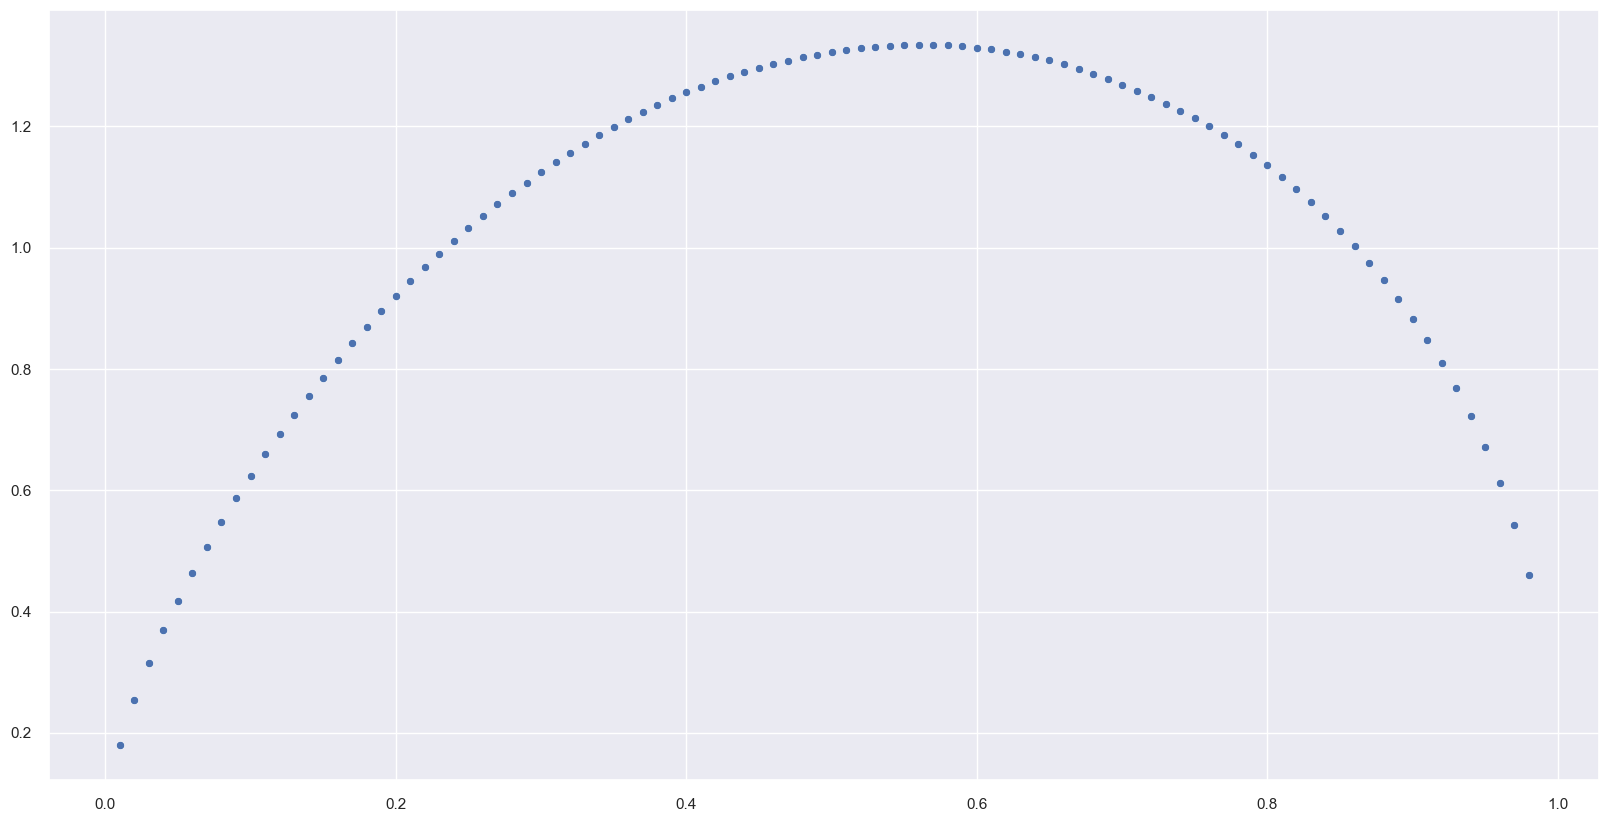

In [ ]:
%load_ext autoreload

%autoreload 2

from ProbEval import pinball_loss_norm

pinball_loss_norm(df=df_results[4], 
                  obs='Actual Value', 
                  mu='Predicted Value', 
                  std='sigma')